In [1]:
import numpy as np
import nnfs

In [2]:
# nnfs.init()
np.random.seed(42)

# Samples

In [3]:
#https://cs231n.github.io/neural-networks-case-study/
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [4]:
# X = np.array([[1, 2, 3, 2.5],
#           [2.0, 5.0, -1.0, 2.0],
#           [-1.5, 2.7, 3.3, -0.8]])

X, y = spiral_data(100, 3) # (# of data points, # of classes)

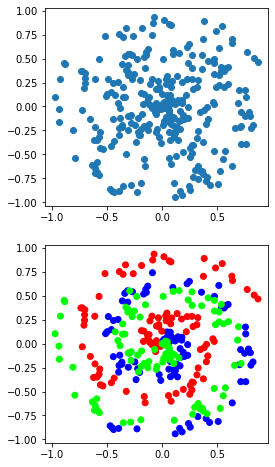

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(4, 8))

ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

# As an Object

In [6]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU

In [7]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Example

In [8]:
# assume X has 3 samples with 4 samples
layer1 = Layer_Dense(X.shape[1], 5)

In [9]:
activation1 = Activation_ReLU()

In [10]:
layer1.forward(X)
print(layer1.output)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 9.17632200e-05  1.27188017e-03 -5.73184527e-04  5.71993415e-04
  -2.04804155e-04]
 [-6.35651986e-04  1.66434557e-03 -2.75822691e-04  1.57487116e-03
  -3.74477279e-04]
 ...
 [ 8.19865417e-02  6.78824252e-02 -7.89660936e-02 -5.37670664e-02
  -6.95197499e-05]
 [ 7.86805224e-02  1.05862673e-01 -9.22881760e-02 -3.00750738e-02
  -7.03714156e-03]
 [ 7.92327113e-02  1.07779690e-01 -9.34118123e-02 -2.96655183e-02
  -7.28751614e-03]]


In [11]:
activation1.forward(layer1.output)
print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.17632200e-05 1.27188017e-03 0.00000000e+00 5.71993415e-04
  0.00000000e+00]
 [0.00000000e+00 1.66434557e-03 0.00000000e+00 1.57487116e-03
  0.00000000e+00]
 ...
 [8.19865417e-02 6.78824252e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [7.86805224e-02 1.05862673e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [7.92327113e-02 1.07779690e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
